<a href="https://colab.research.google.com/github/keeprich/Agentic_AI/blob/main/langchain_ollama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -fsSL https://ollama.com/install.sh | sh
!pip install langchain langchain-ollama


>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [2]:
!nohup ollama serve > /dev/null 2>&1 &


In [3]:
!ollama

Usage:
  ollama [flags]
  ollama [command]

Available Commands:
  serve       Start ollama
  create      Create a model from a Modelfile
  show        Show information for a model
  run         Run a model
  stop        Stop a running model
  pull        Pull a model from a registry
  push        Push a model to a registry
  list        List models
  ps          List running models
  cp          Copy a model
  rm          Remove a model
  help        Help about any command

Flags:
  -h, --help      help for ollama
  -v, --version   Show version information

Use "ollama [command] --help" for more information about a command.


In [4]:
!ollama pull llama3


In [5]:
!ollama list

NAME                 ID              SIZE      MODIFIED      
starcoder2:latest    9f4ae0aff61e    1.7 GB    4 seconds ago    


In [6]:
!ollama run starcoder2


>>> Send a message (/? for help)Gene
... rate
...  com
... plet
... e Te
... rraf
... orm 
... code
...  tha
... t wi
... ll, 
... Use 
... AWS 
... as t
... he p
... rovi
... der 
... in r
... egio
... n "u
... s-ea
... st-1
... ", C
... reat
... e 4 
... EC2 
... inst
... ance
... s of
...  typ
... e t2
... .mic
... ro u
... sing
...  the
...  AMI
...  "am
... i-02
... 0cba
... 7c55
... df1f
... 615"
... , Ge
... nera
... te a
... n SS
... H ke
... y pa
... ir u
... sing
...  tls
... _pri
... vate
... _key
...  and
...  aws
... _key
... _pai
... r, U
... se c
... loud
... -ini
... t (u
... ser_
... data
... ) to
...  ins
... tall
...  Apa
... che2
...  on 
... each
...  ins
... tanc
... e an
... d op
... en p
... ort 
... 80, 
... Use 
... the 
... defa
... ult 
... VPC 
... and 
... subn
... ets 
... (use
...  dat
... a bl
... ocks
...  to 
... retr
... ieve
...  the
... m), 
... Asso
... ciat
... e pu
... blic
...  IPs
...  wit
... h ea
... ch i
... nsta
... nce,
...  Add
...  a t


In [ ]:
# # Worked

# import requests

# def fast_ollama(prompt):
#     response = requests.post(
#         "http://localhost:11434/api/generate",
#         json={"model": "llama3", "prompt": prompt, "stream": False}
#     )
#     return response.json()["response"]

# print(fast_ollama("Write Terraform code to provision an s3 bukets with name kennethdzonytah instance, no comments or markdown."))


Here is the Terraform code:
```
resource "aws_s3_bucket" "example" {
  bucket = "kennethdzonytah-instance"
}
```


In [ ]:
!ollama list

NAME             ID              SIZE      MODIFIED       
llama3:latest    365c0bd3c000    4.7 GB    13 minutes ago    


In [ ]:
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="llama3",         # or "tinyllama", "phi", etc.
    temperature=0,
    num_predict=256         # optional: limit token count for faster output
)


In [ ]:
def generate_and_save(prompt, filename="output.tf"):
    response = llm.invoke(f"Write Terraform code with no comments or markdown. {prompt}")
    content = response.content.strip()

    with open(filename, "w") as f:
        f.write(content)

    print(f"✅ Output saved to {filename}")
    return content



In [ ]:
terraform_code = generate_and_save(
    "Provision an EC2 instance in us-east-1 with t2.micro and a Name tag 'web-server'",
    filename="ec2.tf"
)
print(terraform_code)


✅ Output saved to ec2.tf
```
provider "aws" {
  region = "us-east-1"
}

resource "aws_instance" "web_server" {
  ami           = "ami-0c94855ba95c71c99"
  instance_type = "t2.micro"
  tags = {
    Name = "web-server"
  }
}
```


In [ ]:
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.4 MB/s eta 0:00:00


# lang Graph agent

In [ ]:
!pip install langgraph


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 10.5 MB/s eta 0:00:00


In [ ]:
#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

In [ ]:
!ollama pull llama3.1


In [ ]:
!ollama pull mistral:instruct


In [ ]:
!ollama list

NAME                ID              SIZE      MODIFIED               
mistral:instruct    3944fe81ec14    4.1 GB    Less than a second ago    
llama3.1:latest     46e0c10c039e    4.9 GB    6 minutes ago             
llama3:latest       365c0bd3c000    4.7 GB    27 minutes ago            


In [ ]:
from langchain_ollama import ChatOllama
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent
from langgraph.graph import StateGraph
from langchain.agents import AgentExecutor
from datetime import datetime
import os


# 🔐 Set your Tavily API key
os.environ["TAVILY_API_KEY"] = "tvly-debdL6GX0gCyP51R5i3X"  # Replace with your actual key

# 🕒 Time tool with docstring for validation
@tool
def get_time() -> str:
    """Returns the current time in ISO 8601 format."""
    return datetime.now().isoformat()

# 🌐 Tavily web search tool
search_tool = TavilySearchResults(max_results=5)

# 🧠 Ollama model via LangChain
# llm = ChatOllama(model="llama3.1")

llm = ChatOllama(model="mistral:instruct").bind_tools(tools)


# 🔧 Tool list
tools = [get_time, search_tool]

# ⚙️ Create a ReAct-style agent with tool support
# react_agent_executor: AgentExecutor = create_react_agent(llm=llm, tools=tools)


react_agent_executor = create_react_agent(ChatOllama(model="mistral:instruct"), tools)




from typing import TypedDict

class AgentState(TypedDict):
    input: str


from langgraph.graph import StateGraph

graph = StateGraph(AgentState)
graph.add_node("agent", react_agent_executor)
graph.set_entry_point("agent")
workflow = graph.compile()



# 🔄 LangGraph stateful wrapper
# graph = StateGraph(agent_executor=react_agent_executor)
# workflow = graph.compile()

# 🚀 Run the agent with a query
# query = "What are the latest Terraform announcements as of today, and how do they relate to infrastructure as code best practices?"
# response = workflow.invoke(query)




query = "What are the latest Terraform announcements as of today, and how do they relate to infrastructure as code best practices?"
response = workflow.invoke({"input": query})
print("🔎 Agent Response:")
print(response)


print("🔎 Agent Response:")
print(response)


🔎 Agent Response:
{'input': 'What are the latest Terraform announcements as of today, and how do they relate to infrastructure as code best practices?'}
🔎 Agent Response:
{'input': 'What are the latest Terraform announcements as of today, and how do they relate to infrastructure as code best practices?'}


In [ ]:
graph = StateGraph(AgentState)
graph.add_node("agent", react_agent_executor)
graph.set_entry_point("agent")
workflow = graph.compile()


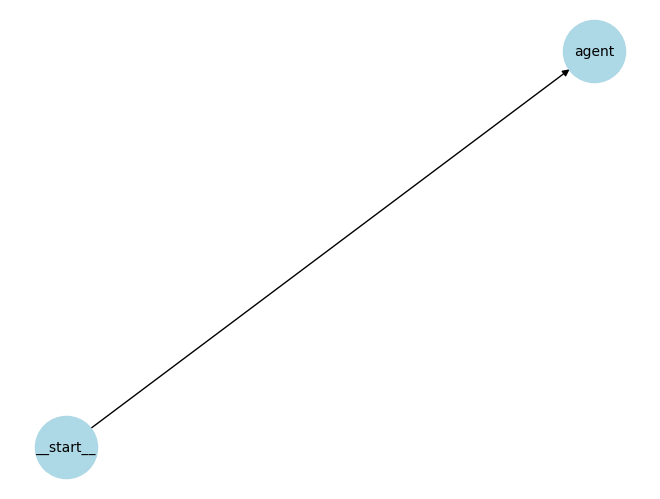

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Add nodes and edges from workflow
for node in graph.nodes:
    G.add_node(node)

for edge in graph.edges:
    G.add_edge(edge[0], edge[1])

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)
plt.show()

In [ ]:
# 🧱 Imports
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_ollama import ChatOllama
from langgraph.prebuilt import create_react_agent
from langgraph.graph import StateGraph
from datetime import datetime
from typing import TypedDict
import os

# 🔐 Tavily API key
os.environ["TAVILY_API_KEY"] = "tvly-dev-"  # Replace with actual key

# 🛠️ Structured Tools
@tool
def get_current_date() -> str:
    """Returns the current date in ISO format."""
    return datetime.now().isoformat()

atavily_search = TavilySearchResults(max_results=5)

# 🧠 LLM: Must support tool calling
llm = ChatOllama(model="mistral:instruct").bind_tools([get_current_date, atavily_search])

# ⚙️ Agent construction
agent_executor = create_react_agent(llm, [get_current_date, atavily_search])

# 🧩 State schema
class AgentState(TypedDict):
    input: str

# 🔄 LangGraph wiring
graph = StateGraph(AgentState)
graph.add_node("agent", agent_executor)
graph.set_entry_point("agent")
workflow = graph.compile()

# 🚀 Run query
response = workflow.invoke({"input": "What are the latest Terraform updates today, and how do they impact infrastructure best practices?"})
print("🔎 Final Agent Response:\n", response)


🔎 Final Agent Response:
 {'input': 'What are the latest Terraform updates today, and how do they impact infrastructure best practices?'}


In [ ]:
print("🔧 Nodes:", workflow.nodes)
print("🔗 Edges:", graph.edges)

🔧 Nodes: {'__start__': <langgraph.pregel.read.PregelNode object at 0x7a0d377e25d0>, 'agent': <langgraph.pregel.read.PregelNode object at 0x7a0d36e48c10>}
🔗 Edges: {('__start__', 'agent')}


In [ ]:
query = "What are the latest Terraform updates today, and how do they impact infrastructure best practices?"
response = workflow.invoke({"input": query})
print("🔎 Final Agent Response:\n", response)

🔎 Final Agent Response:
 {'input': 'What are the latest Terraform updates today, and how do they impact infrastructure best practices?'}


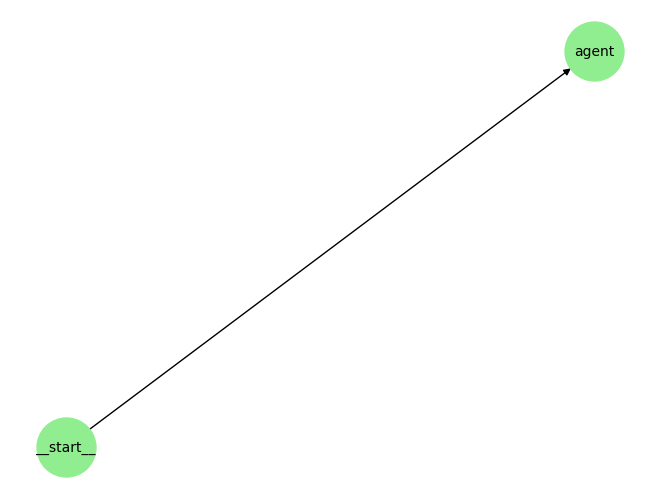

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_nodes_from(workflow.nodes)
G.add_edges_from(graph.edges)

nx.draw(G, with_labels=True, node_color='lightgreen', node_size=1800, font_size=10)
plt.show()